In [1]:
# Importing the library
import fbprophet

In [2]:
# loading the car sales dataset
from pandas import read_csv

In [3]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

In [4]:
df = read_csv(path, header=0)

In [5]:
df.shape

(108, 2)

In [6]:
df.info

<bound method DataFrame.info of        Month  Sales
0    1960-01   6550
1    1960-02   8728
2    1960-03  12026
3    1960-04  14395
4    1960-05  14587
..       ...    ...
103  1968-08  16722
104  1968-09  14385
105  1968-10  21342
106  1968-11  17180
107  1968-12  14577

[108 rows x 2 columns]>

In [7]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [8]:
df.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


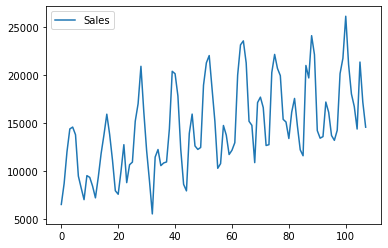

In [10]:
from matplotlib import pyplot
df.plot()
pyplot.show()

In [13]:
from pandas import to_datetime
from fbprophet import Prophet

In [14]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds'] = to_datetime(df['ds'])

In [16]:
# define the model
model = Prophet()

In [17]:
# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
# Make an In-Sample Forecast

In [20]:
# define the period for which we want a prediction
from pandas import DataFrame
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [21]:
# use the model to make a forecast
forecast = model.predict(future)

In [22]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14339.191754  12737.471712  15942.238872
1 1968-02-01  14911.570730  13374.953428  16526.453993
2 1968-03-01  20837.800941  19303.827796  22367.640275
3 1968-04-01  22870.891298  21276.397601  24362.334698
4 1968-05-01  24183.295848  22707.133919  25883.131235


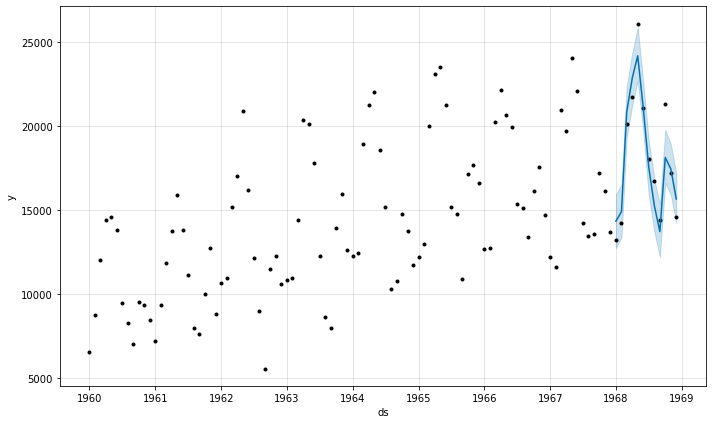

In [23]:
# plot forecast
model.plot(forecast)
pyplot.show()

In [25]:
# Make an Out-of-Sample Forecast

In [26]:
# define the period for which we want a prediction
from pandas import DataFrame
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [27]:
# use the model to make a forecast
forecast = model.predict(future)

In [28]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15376.752451  13863.000244  16948.492018
1 1969-02-01  16138.731483  14560.779183  17697.151240
2 1969-03-01  21351.103785  19781.697874  22916.463101
3 1969-04-01  23479.854771  21866.893861  25037.129888
4 1969-05-01  24992.388293  23470.293987  26700.098191


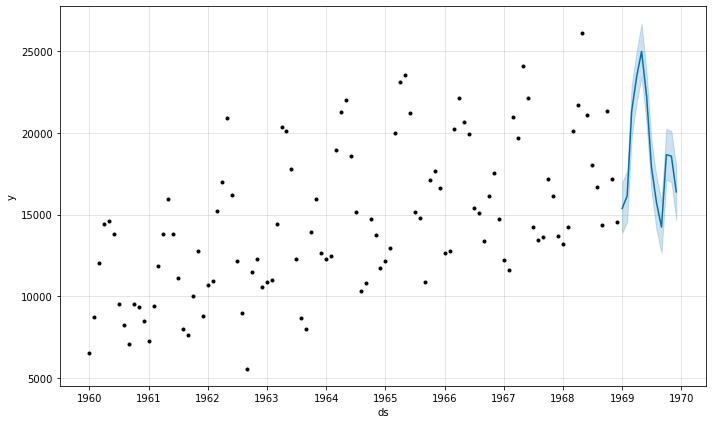

In [29]:
# plot forecast
model.plot(forecast)
pyplot.show()

In [30]:
# Manually Evalute Forecast Model

In [31]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [33]:
# calculate MAE between expected and predicted values for december
from sklearn.metrics import mean_absolute_error
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1370.127


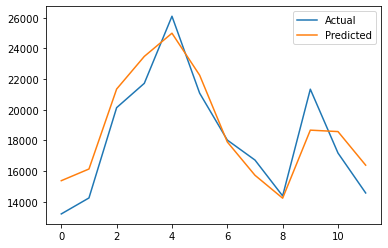

In [34]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()